In [1]:
import pandas as pd
import nltk
import sklearn

## Load & Exploring dataset

In [2]:
dataset = pd.read_csv("./SMSCollection.txt", sep='\t')
dataset.columns=["type", "content"]
dataset.head()

,type,content
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
dataset.describe()

,type,content
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [4]:
dataset.type.unique()

array(['ham', 'spam'], dtype=object)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5571 non-null   object
 1   content  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: ylabel='type'>

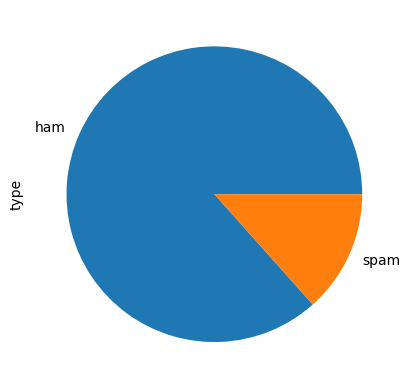

In [6]:
dataset.type.value_counts(normalize=True).plot.pie()

## Cleaning Text

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
ps = nltk.PorterStemmer()

en_stopwords = set(stopwords.words("english"))
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in en_stopwords]
    return ' '.join(filtered_text)

In [8]:
cleaned_text = []
for text in dataset.content:
    text=text.lower()
    text = re.sub('[^a-zA-Z!\?]', ' ', text)
    text = re.sub('\s{2,}', ' ', text)
    text = remove_stopwords(text)
    words = [ps.stem(word) for word in word_tokenize(text)]
    cleaned_text.append(' '.join(words))

dataset['cleaned_text'] = cleaned_text

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5571 non-null   object
 1   content       5571 non-null   object
 2   cleaned_text  5571 non-null   object
dtypes: object(3)
memory usage: 130.7+ KB


In [10]:
dataset.content[0]

'Ok lar... Joking wif u oni...'

In [11]:
dataset.cleaned_text[0]

'ok lar joke wif u oni'

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=25000)
tfidf.fit(cleaned_text)
tokenized_text=tfidf.transform(cleaned_text)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
features_tfidf = tfidf.fit_transform(cleaned_text)
print(features_tfidf.shape)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names_out()
features_tfidf.head()

(5571, 2500)


,aah,aathi,abi,abiola,abl,abt,abta,ac,acc,accept,...,yo,yoga,yogasana,yor,yr,yummi,yun,yuo,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler()
lbl = LabelEncoder()
X = scaler.fit_transform(features_tfidf)
y = lbl.fit_transform(dataset['type'])

In [15]:
lbl.classes_

array(['ham', 'spam'], dtype=object)

## Split data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

## Create Model, fit and test

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
rf_model.score(X_test,y_test)

0.9829596412556054